In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
import utils

In [2]:
bg_path = '/its/home/bb345/5-4most_data/CRS/target_catalogues/BG/full_legacy_no_colour_sel/desi_bg_nomaskbit_mask_4M.fits'

In [3]:
bg_catalogue = Table.read(bg_path)

/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


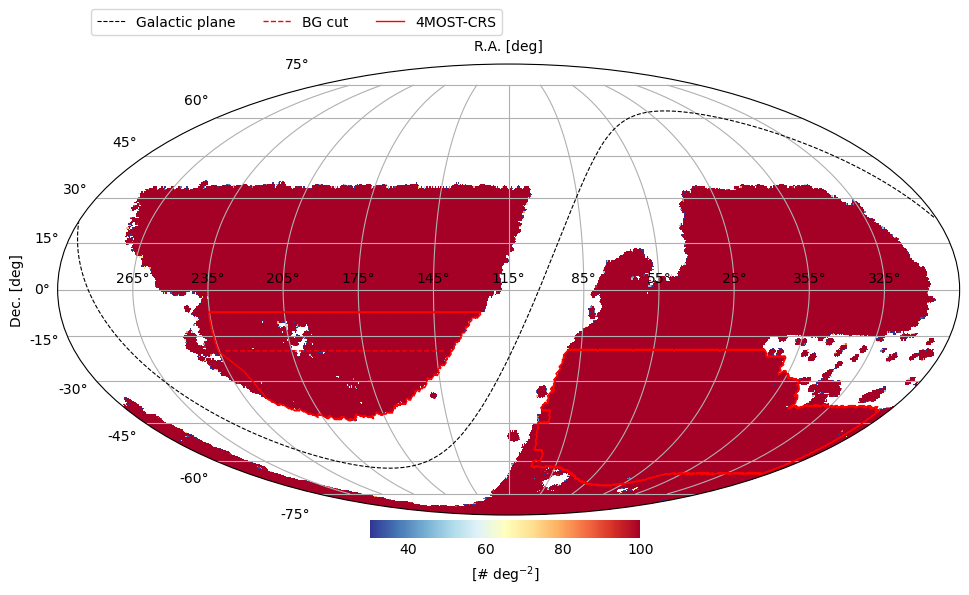

In [4]:
hpmap = utils.create_hp_map(bg_catalogue['RA'], bg_catalogue['DEC'], nside=128)
utils.plot_moll(hpmap, rot=115, min=30, max=100, fourmost_footprint=True)

In [5]:
print(bg_catalogue.colnames)

['RELEASE', 'BRICKID', 'BRICKNAME', 'OBJID', 'TYPE', 'RA', 'DEC', 'RA_IVAR', 'DEC_IVAR', 'EBV', 'FLUX_G', 'FLUX_R', 'FLUX_I', 'FLUX_Z', 'FLUX_W1', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_I', 'FLUX_IVAR_Z', 'FLUX_IVAR_W1', 'MW_TRANSMISSION_G', 'MW_TRANSMISSION_R', 'MW_TRANSMISSION_I', 'MW_TRANSMISSION_Z', 'MW_TRANSMISSION_W1', 'ANYMASK_G', 'ANYMASK_R', 'ANYMASK_I', 'ANYMASK_Z', 'ALLMASK_G', 'ALLMASK_R', 'ALLMASK_I', 'ALLMASK_Z', 'WISEMASK_W1', 'WISEMASK_W2', 'PSFSIZE_G', 'PSFSIZE_R', 'PSFSIZE_I', 'PSFSIZE_Z', 'PSFDEPTH_G', 'PSFDEPTH_R', 'PSFDEPTH_I', 'PSFDEPTH_Z', 'GALDEPTH_G', 'GALDEPTH_R', 'GALDEPTH_I', 'GALDEPTH_Z', 'PSFDEPTH_W1', 'PSFDEPTH_W2', 'WISE_COADD_ID', 'SHAPE_R', 'SHAPE_R_IVAR', 'SHAPE_E1', 'SHAPE_E1_IVAR', 'SHAPE_E2', 'SHAPE_E2_IVAR', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_I', 'FIBERFLUX_Z', 'FIBERTOTFLUX_G', 'FIBERTOTFLUX_R', 'FIBERTOTFLUX_I', 'FIBERTOTFLUX_Z', 'REF_CAT', 'REF_ID', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR', 'PARALLAX', 'PARALLAX_IVAR',

In [6]:
bg_foot = bg_catalogue['in_S8']

In [8]:
psf_depth_mag = 22.5 - 2.5*np.log10(5/np.sqrt(bg_catalogue['PSFDEPTH_R'][bg_foot]))

/tmp/ipykernel_3681094/1562580799.py:1: RuntimeWarning: divide by zero encountered in divide
  psf_depth_mag = 22.5 - 2.5*np.log10(5/np.sqrt(bg_catalogue['PSFDEPTH_R'][bg_foot]))


/mnt/lustre/users/astro/bb345/1-4MOST/3-CRS/4-crs_tools/CRStools/utils.py:647: RuntimeWarning: invalid value encountered in divide
  m = hp.ma(hmap) if whmap is None else hp.ma(whmap/hmap)
/its/home/bb345/.conda/envs/clustering-3.12/lib/python3.12/site-packages/healpy/visufunc.py:764: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))


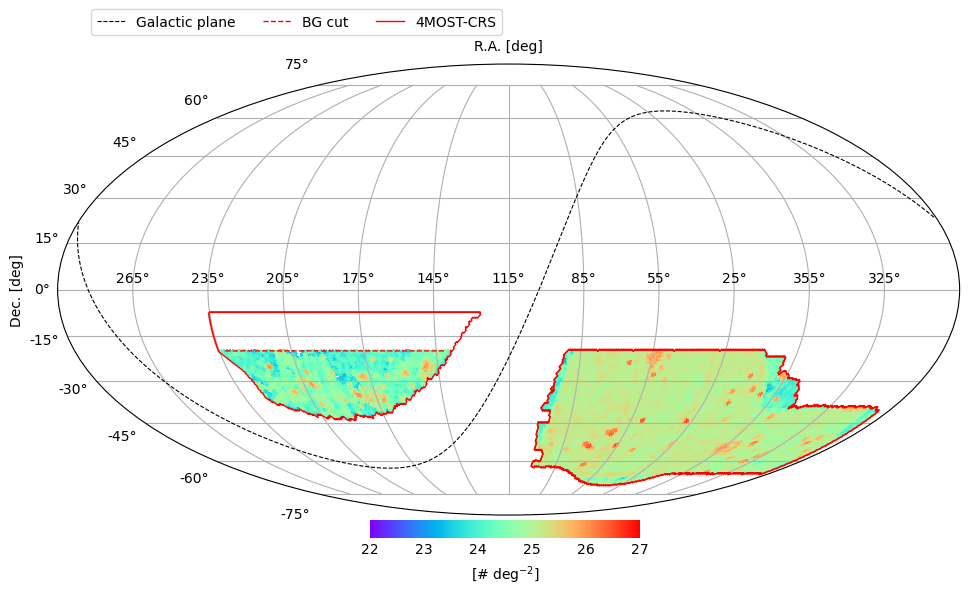

In [9]:
valid = psf_depth_mag > 0
hpmap = utils.create_hp_map(bg_catalogue['RA'][bg_foot][valid], bg_catalogue['DEC'][bg_foot][valid], nside=128)
hpmap_ebv = utils.create_hp_map(bg_catalogue['RA'][bg_foot][valid], bg_catalogue['DEC'][bg_foot][valid], weight=psf_depth_mag[valid], nside=128)
utils.plot_moll(hpmap, hpmap_ebv, rot=115, min=22, max=27, fourmost_footprint=True, cmap='rainbow')


In [10]:
min(bg_catalogue['PSFDEPTH_R'][bg_foot])

0.0

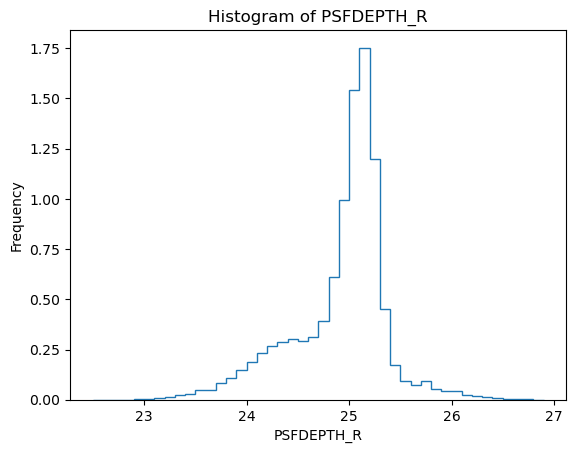

In [11]:
plt.hist(psf_depth_mag[(psf_depth_mag > 0)], 
         bins=np.arange(22.5, 27, 0.1), 
         histtype='step', density=True, label='PSFDEPTH_R')

for i in range(1, 6):
    plt.hist
plt.xlabel("PSFDEPTH_R")
plt.ylabel("Frequency")
plt.title("Histogram of PSFDEPTH_R")
plt.show()

In [13]:
mask = np.ones(len(bg_catalogue), dtype=bool)

In [14]:
mask &= bg_foot

In [15]:
len(bg_catalogue[mask])

4744180

In [16]:
len(bg_catalogue[bg_foot])

4744180